<a href="https://colab.research.google.com/github/ImSumitJadhav/Yes-Bank-Stock-Prediction/blob/main/Yes_Bank_Stock_Price_REGG_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='red'> **Project Name-Yes Bank Stock Prediction**

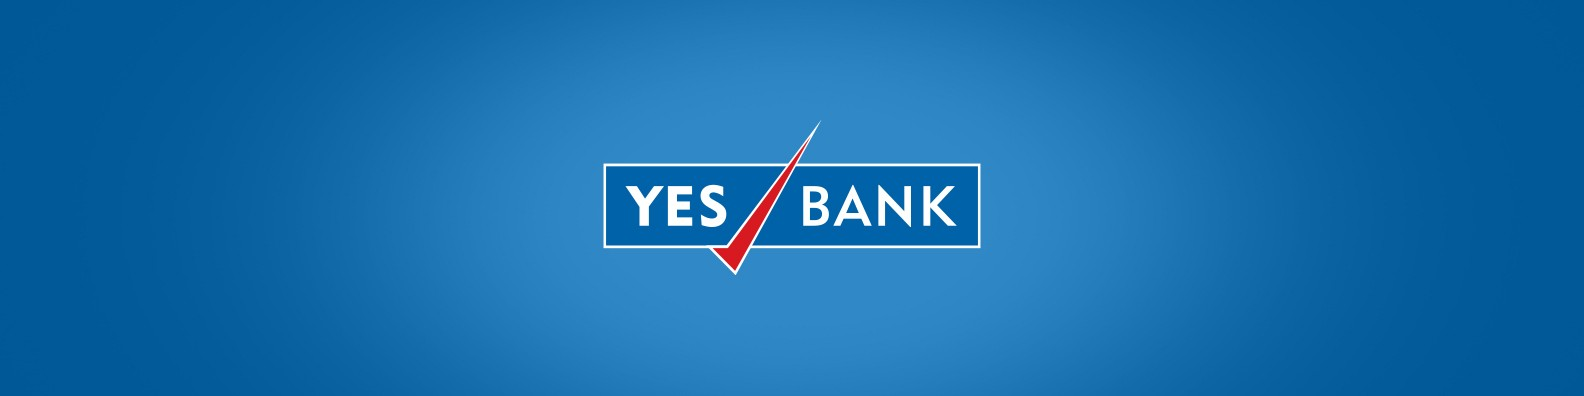

In [61]:
#import library and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

In [154]:
#import drive
drive.mount('/content/MyDrive')
df=pd.read_csv('/content/MyDrive/MyDrive/alma project prctice/data_YesBank_StockPrices.csv')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


#<font color='red'> **Let's go...**

In [149]:
df.head()     #to show top 5 rows

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [150]:
df.tail()   #to show bottom 5 rows

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [151]:
df.size   #size of actual dataframe

925

In [152]:
#find out null values in columns
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [153]:
df.info()   #get information about datatype in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [155]:
df.describe()   #summery

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


#<font color='red'> **Data Cleaning**

In [156]:
df[['Month', 'Year']] = dfz['Date'].str.split('-', 1, expand=True)    #Split date column in month and year

In [157]:
df2=df.copy()
df2=df2.drop(['Date','Year'],axis=1)    #drop unwanted columns
df2

,Open,High,Low,Close,Month
0,13.00,14.00,11.25,12.46,Jul
1,12.58,14.88,12.55,13.42,Aug
2,13.48,14.87,12.27,13.30,Sep
3,13.20,14.47,12.40,12.99,Oct
4,13.35,13.88,12.88,13.41,Nov
...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,Jul
181,12.00,17.16,11.85,14.37,Aug
182,14.30,15.34,12.75,13.15,Sep
183,13.30,14.01,12.11,12.42,Oct


#<font color='red'> **Data Visualization**

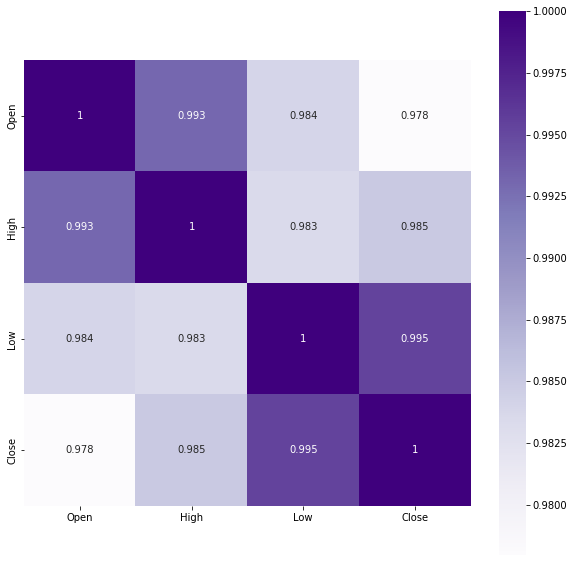

In [158]:
#Correlation
cor=df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True,annot=True,fmt=".3g",cmap="Purples")

**>>>>>>This heatmap shows that Open, Low and High values highly correlated with our dependant variable Close.**

In [49]:
column_names=["Open","High","Low"]

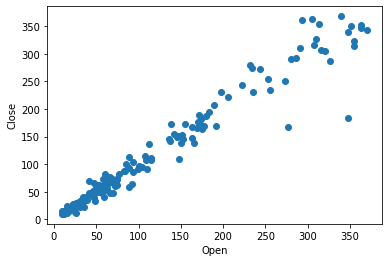

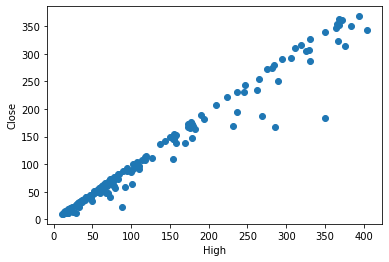

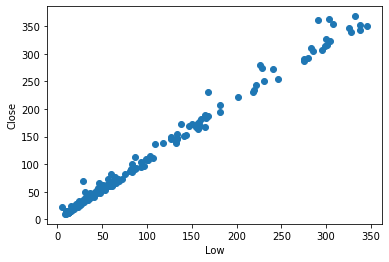

In [159]:
for col in column_names:
  plt.xlabel(col,fontsize=10)
  plt.ylabel('Close',fontsize=10)
  
  plt.scatter(df2[col],df2["Close"])    #scatter plot
  plt.show()

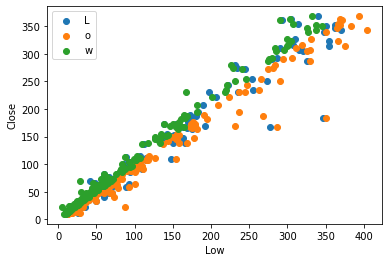

In [160]:
for col in column_names:
  plt.xlabel(col,fontsize=10)
  plt.ylabel('Close',fontsize=10)
  
  plt.scatter(df2[col],df2["Close"])    #plot all columns scatter plot in one graph
  plt.legend(col)
plt.show()

**>>>>>>>>>>>>This shows that Yes bank stock dataset is linear type.**

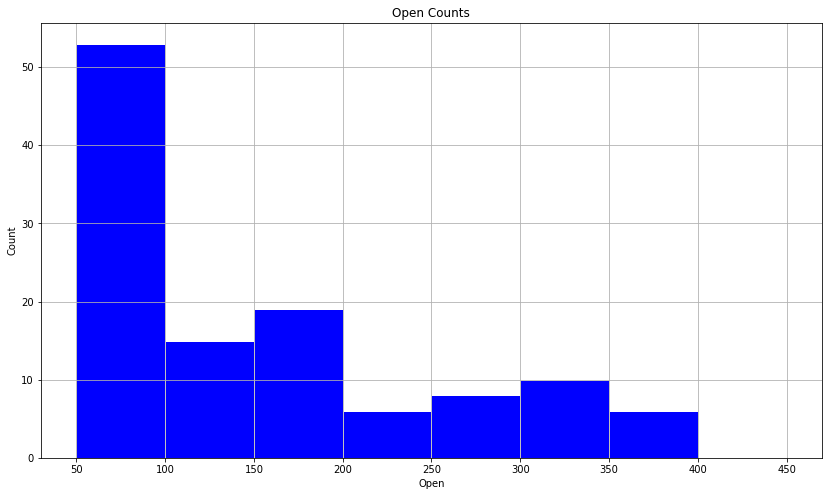

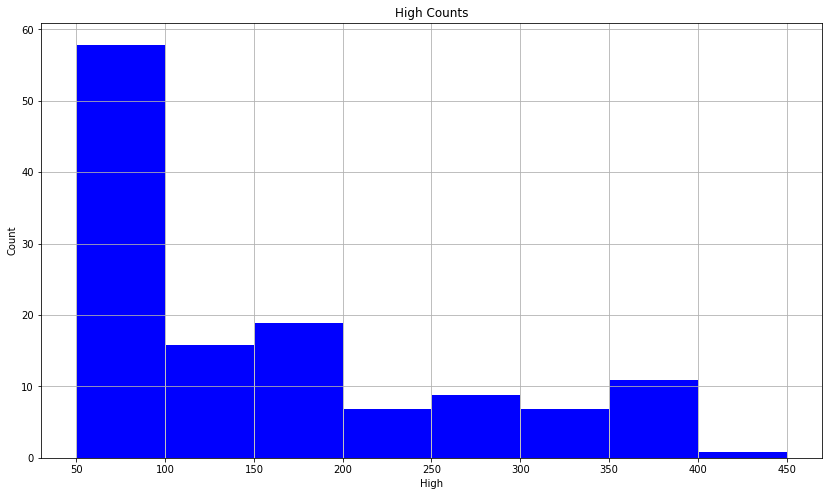

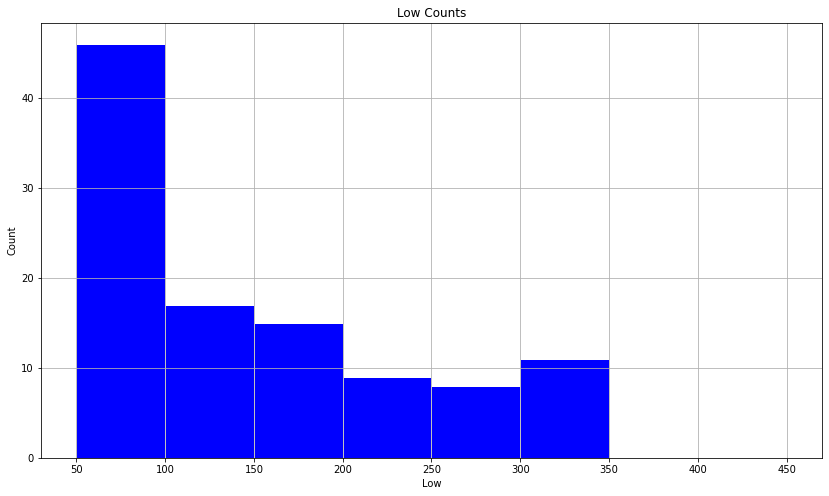

In [161]:
for col in column_names:             
    fig = plt.figure(figsize=(14, 8))  #to plot count graph
    ax = fig.gca()
    feature = df2[col]
    feature.hist(bins=[50,100,150,200,250,300,350,400,450], ax = ax,color="blue",edgecolor="white")  
    plt.xlabel(col)
    plt.ylabel('Count')  
    ax.set_title(col+" Counts")
plt.show()

#<font color='red'> **Regression Algorithms**

In [162]:
#get dummy columns for month column
df3=pd.get_dummies(df2,columns=['Month'])
df3

,Open,High,Low,Close,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,13.00,14.00,11.25,12.46,0,0,0,0,0,1,0,0,0,0,0,0
1,12.58,14.88,12.55,13.42,0,1,0,0,0,0,0,0,0,0,0,0
2,13.48,14.87,12.27,13.30,0,0,0,0,0,0,0,0,0,0,0,1
3,13.20,14.47,12.40,12.99,0,0,0,0,0,0,0,0,0,0,1,0
4,13.35,13.88,12.88,13.41,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,0,0,0,0,0,1,0,0,0,0,0,0
181,12.00,17.16,11.85,14.37,0,1,0,0,0,0,0,0,0,0,0,0
182,14.30,15.34,12.75,13.15,0,0,0,0,0,0,0,0,0,0,0,1
183,13.30,14.01,12.11,12.42,0,0,0,0,0,0,0,0,0,0,1,0


In [163]:
x=df3.copy()
x=x.drop("Close",axis=1)
x   #<<<<<<<<<<<<Independant dataframe

,Open,High,Low,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,13.00,14.00,11.25,0,0,0,0,0,1,0,0,0,0,0,0
1,12.58,14.88,12.55,0,1,0,0,0,0,0,0,0,0,0,0
2,13.48,14.87,12.27,0,0,0,0,0,0,0,0,0,0,0,1
3,13.20,14.47,12.40,0,0,0,0,0,0,0,0,0,0,1,0
4,13.35,13.88,12.88,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,25.60,28.30,11.10,0,0,0,0,0,1,0,0,0,0,0,0
181,12.00,17.16,11.85,0,1,0,0,0,0,0,0,0,0,0,0
182,14.30,15.34,12.75,0,0,0,0,0,0,0,0,0,0,0,1
183,13.30,14.01,12.11,0,0,0,0,0,0,0,0,0,0,1,0


In [164]:
y=pd.DataFrame(df3["Close"])
y     #<<<<<<<<<<Dependant dataframe

,Close
0,12.46
1,13.42
2,13.30
3,12.99
4,13.41
...,...
180,11.95
181,14.37
182,13.15
183,12.42


In [165]:
#train and test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 15)
(37, 15)


#<font color='red'> **LinearRegression**

In [166]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)    #fit model

LinearRegression()

In [167]:
reg.score(X_train,y_train)*100  #accuracy

99.579426010895

In [168]:
reg.score(X_test,y_test)*100    #accuracy

99.23214795760649

In [96]:
reg.coef_

array([[-0.43472539,  0.46615657,  1.00468382,  0.60016057,  0.84745488,
        -0.79540636,  1.30028927,  3.96416338, -1.35573475, -1.50151186,
         1.28300547,  1.39609604, -1.27666943, -1.28189903, -3.17994818]])

In [169]:
#predicted train values
y_train_prd=reg.predict(X_train)
y_train_prd

array([[145.8613702 ],
       [ 21.64212939],
       [ 64.79872208],
       [ 47.45601281],
       [ 15.92513669],
       [ 58.78045754],
       [ 53.83344771],
       [ 38.85859893],
       [ 40.05419904],
       [ 13.40017686],
       [ 92.45578352],
       [ 12.10469953],
       [ 38.57313547],
       [ 31.83447329],
       [323.25796049],
       [ 75.64195618],
       [348.40392657],
       [ 25.12396324],
       [ 43.71907454],
       [ 53.46258841],
       [325.43674332],
       [ 13.43468228],
       [106.54055266],
       [ 35.70132025],
       [114.82061662],
       [ 60.08242219],
       [342.28962134],
       [ 66.92807786],
       [107.70061958],
       [139.48979322],
       [ 37.89382197],
       [ 94.67484597],
       [107.03467096],
       [139.38878045],
       [ 17.07616052],
       [ 96.16036456],
       [ 67.30481533],
       [ 11.75983253],
       [ 56.15936612],
       [ 79.058182  ],
       [182.23859174],
       [ 13.31497403],
       [ 20.36541118],
       [108

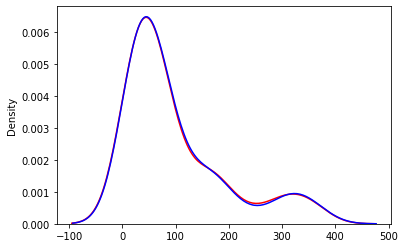

In [170]:
axx=sns.distplot(y_train,hist=False,color="r")
sns.distplot(y_train_prd,hist=False,color="b",ax=axx)   #plot accuracy graph

In [171]:
#predicted test values
y_test_prd=reg.predict(X_test)
y_test_prd

array([[ 32.73557099],
       [140.59905544],
       [ 44.06914608],
       [140.80805647],
       [ 67.96068358],
       [ 36.64371951],
       [231.89149953],
       [ 19.48551385],
       [ 14.67299897],
       [218.16655684],
       [301.71639946],
       [ 86.22884134],
       [152.64180924],
       [ 58.38807299],
       [340.83937489],
       [261.83858945],
       [ 73.39411356],
       [ 29.76451344],
       [264.55014961],
       [ 55.68226083],
       [ 11.91423172],
       [115.35515471],
       [148.61845905],
       [ 58.58129825],
       [216.34684575],
       [ 46.91726083],
       [247.01856639],
       [ 13.87098772],
       [107.31437499],
       [ 57.36674074],
       [369.47184103],
       [338.34520122],
       [ 70.55951403],
       [169.20858562],
       [ 37.02935807],
       [ 50.34604391],
       [260.81085143]])

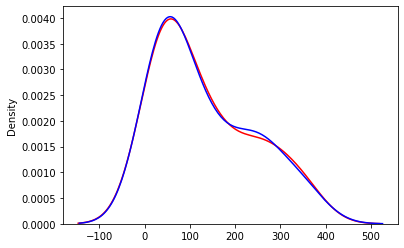

In [172]:
#plot accuracy graph
axx1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(y_test_prd,hist=False,color="b",ax=axx1)

#<font color='red'> **RandomForestRegressor**

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
rfr=RandomForestRegressor(n_estimators=300) #RandomForestRegressor with branch size=300

In [179]:
rfr.fit(X_train,y_train)  #model fitting

RandomForestRegressor(n_estimators=300)

In [180]:
rfr.score(X_train,y_train)*100

99.82267611185088

In [119]:
rfr.score(X_test,y_test)*100

98.55625826611046

In [181]:
y_train_prd2=rfr.predict(X_train)
y_train_prd2  #<<<<<<predicted values

array([152.1418    ,  19.51216667,  67.3491    ,  45.7503    ,
        14.7322    ,  56.06896667,  50.8494    ,  38.24216667,
        46.437     ,  14.99256667,  88.7635    ,  13.27546667,
        36.37256667,  28.96343333, 321.60893333,  73.0932    ,
       349.10593333,  24.6054    ,  46.49706667,  54.7083    ,
       332.74256667,  12.7028    , 108.65773333,  32.8123    ,
       112.72773333,  61.50546667, 346.61426667,  67.49886667,
        97.63146667, 145.38796667,  41.9612    ,  92.65026667,
       110.0261    , 145.559     ,  14.3168    ,  95.7924    ,
        69.3793    ,  13.27086667,  54.53566667,  74.73476667,
       183.5305    ,  11.9077    ,  18.58403333, 101.1121    ,
        56.2194    ,  27.0857    , 116.6914    , 173.93096667,
       130.08756667,  50.5392    , 352.69606667,  26.8491    ,
        39.23983333, 153.6018    ,  94.03946667,  64.1392    ,
       209.16496667,  14.4484    ,  62.22693333,  33.36473333,
        30.1974    ,  68.14936667,  18.05726667, 290.47

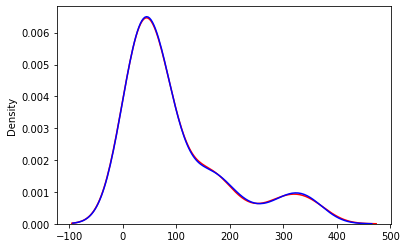

In [129]:
axx3=sns.distplot(y_train,hist=False,color="r")
sns.distplot(y_train_prd2,hist=False,color="b",ax=axx3)

In [182]:
y_test_prd2=rfr.predict(X_test)
y_test_prd2   #<<<<<<predicted values

array([ 33.0806    , 150.32166667,  46.45283333, 144.91223333,
        65.06876667,  30.56603333, 238.70106667,  17.73073333,
        13.56093333, 207.71526667, 305.08106667,  95.1127    ,
       152.9496    ,  59.83016667, 347.8664    , 244.819     ,
        71.27903333,  26.7898    , 242.55326667,  52.78493333,
        13.48703333, 126.08823333, 161.51106667,  56.94166667,
       228.1899    ,  42.4815    , 271.26803333,  13.12046667,
       111.28173333,  57.80733333, 354.29866667, 319.07763333,
        71.66446667, 169.44656667,  39.2762    ,  49.50936667,
       261.53503333])

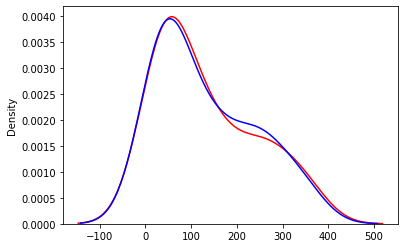

In [131]:
axx4=sns.distplot(y_test,hist=False,color="r")
sns.distplot(y_test_prd2,hist=False,color="b",ax=axx4)

#<font color='red'> **Conclusion**

**1.From visualization we clearly see that given dataset is linear type.**

**2.So I use LinearRegression algorithm which gives excellent accuracy-**



*   for train data-99.57 percent
*   for test data-99.23 percent


**3.I can also use RandomForestRegressor algorithm-**



*   for train data-99.8 percent
*   for test data-98.5 percent





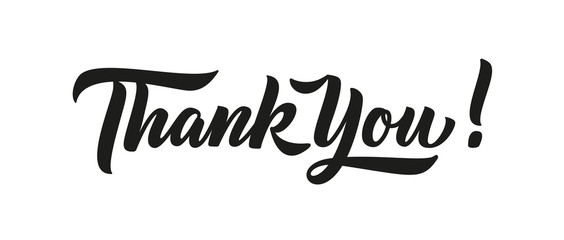